# Mecánica Celeste: teoría, algoritmos y problemas
# Por Jorge I. Zuluaga

En estos cuadernos hemos compilado la mayoría de los códigos que vienen con el libro [**Mecánica Celeste: teoría, algoritmos y problemas**](https://www.libreriadelau.com/bw-mecanica-celeste-teoria-algoritmos-y-problemas-u-de-antioquia-fisica/p). En cada cuaderno encontrará códigos de secciones o capítulos enteros. Para explicaciones detalladas de lo que hacen los códigos refiérase a la sección o capítulo respectivo. Para mayor comodidad puede leer o ejecutar este cuaderno usando `Google Colab`.

<a target="_blank" href="https://colab.research.google.com/github/seap-udea/pymcel/blob/main/ejemplos/cuadernos-libro/mcel_zuluaga-introduccion.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Algorítmos de la introducción

### Instalación e importación

Si está usando este cuaderno en `Colab` debería instalar `pymcel` antes de comenzar: 

In [16]:
!pip install -Uq pymcel
%load_ext autoreload 
%autoreload 2

### Mecánica celeste en Python

¿Qué hace este código?

In [17]:
import math
e=0.3
M=0.5
E=M
Eo=2*M
while abs(E-Eo)>0.01:
    Eo=E
    E=M+e*math.sin(E)
print("E = ",E)

E =  0.6886561865220447


El lenguaje más sencillo:

In [18]:
from math import pi
for n in range(1,5):
    print("pi a la",n,"es",pi**n)

pi a la 1 es 3.141592653589793
pi a la 2 es 9.869604401089358
pi a la 3 es 31.006276680299816
pi a la 4 es 97.40909103400242


Una gráfica básica en Python:

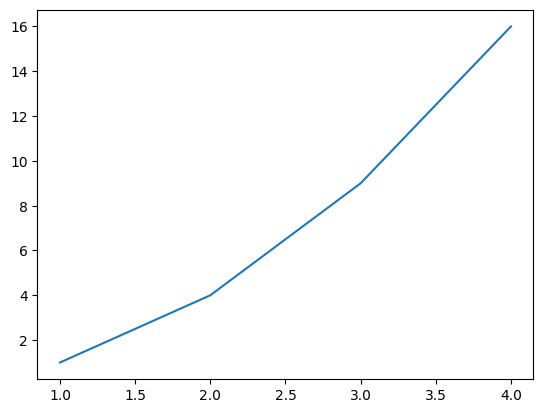

In [19]:
from matplotlib.pyplot import plot
plot([1,2,3,4],[1,4,9,16]);

### Mecánica celeste en SPICE

Antes de usar `SPICE` es necesario descargar los kernels:

In [16]:
from pymcel import descarga_kernels
descarga_kernels(overwrite=True)

Paquete pymcel cargado. Versión: 0.6.0
Descargando kernel 'de430.bsp' en 'pymcel/'...
Hecho.
Descargando kernel 'de430_tech-comments.txt' en 'pymcel/'...
Hecho.
Descargando kernel 'latest_leapseconds.tls' en 'pymcel/'...
Hecho.
Descargando kernel 'naif0012.tls' en 'pymcel/'...
Hecho.
Descargando kernel 'earth_latest_high_prec.bpc' en 'pymcel/'...
Hecho.
Descargando kernel 'earth_fixed.tf' en 'pymcel/'...
Hecho.
Descargando kernel 'gm_de431.tpc' en 'pymcel/'...
Hecho.
Descargando kernel 'pck00011.tpc' en 'pymcel/'...
Hecho.


Uso básico de `SPICE`:

In [7]:
import spiceypy as spy
spy.furnsh('pymcel/data/naif0012.tls')
spy.furnsh('pymcel/data/de430.bsp')
et=spy.str2et("05/29/1919 09:08:00 UTC-3")
sol,tluz=spy.spkgeo(10,et,"J2000",0)
tierra,tluz=spy.spkgeo(399,et,"J2000",0)
distancia=spy.vnorm(tierra-sol)

# Salida
print(f"Distancia Tierra-Sol durante el eclipse de 1919: {distancia:.0f} km")

Distancia Tierra-Sol durante el eclipse de 1919: 151649284 km


### Algoritmos

Gráficos generados cuyo algoritmo no es incluído en el texto:

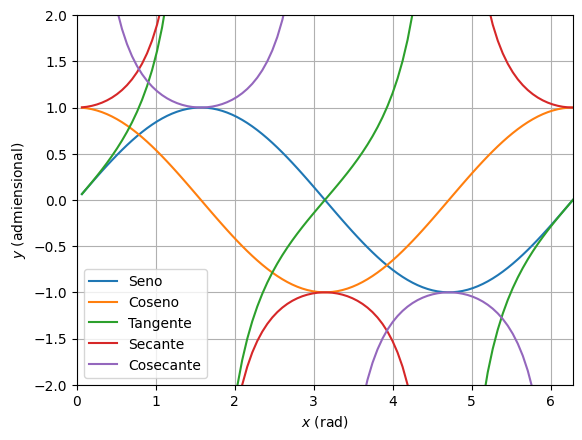

In [21]:
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure()
ax=fig.gca()

x=np.linspace(0,2*np.pi,100)
ysin=np.sin(x)
ycos=np.cos(x)
cond=abs(ysin*ycos)>0

x=x[cond]
ysin=ysin[cond]
ycos=ycos[cond]

ytan=ysin/ycos
ytan[abs(ytan)>10]=np.nan

ysec=1/ycos
ysec[abs(ysec)>10]=np.nan

ycsc=1/ysin
ycsc[abs(ycsc)>10]=np.nan

ax.plot(x,ysin,'-',label='Seno');
ax.plot(x,ycos,'-',label='Coseno');
ax.plot(x,ytan,'-',label='Tangente');
ax.plot(x,ysec,'-',label='Secante');
ax.plot(x,ycsc,'-',label='Cosecante');

ax.set_xlim((0,2*np.pi))
ax.set_ylim((-2,2))

ax.set_xlabel(r"$x$ (rad)")
ax.set_ylabel(r"$y$ (admiensional)")

ax.legend(loc='best')
ax.grid()


<hr/>

Para explorar más cuadernos del libro vaya al [repositorio de en GitHub](https://github.com/seap-udea/pymcel/tree/main/ejemplos/cuadernos-libro)